# Importing Libraries

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Data Reading And Analysing the Dataset

In [91]:
pd.set_option('display.max_columns', None)
df=pd.read_csv(r"C:\Users\Avinash\Desktop\Projects\EvaluationProjects\11_InsuranceClaimFraudDetection\Automobile_insurance_fraud.csv",na_values=["?","0"])
df.head()#changing ? and 0 to NaN values

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328.0,48,521585,17-10-2014,OH,250/500,1000,1406.91,NaN,466132,MALE,MD,craft-repair,sleeping,husband,53300.0,NaN,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5.0,1,YES,1.0,2.0,YES,71610,6510.0,13020.0,52080,Saab,92x,2004,Y,NaN
1,228.0,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000.0,468176,MALE,MD,machine-op-inspct,reading,other-relative,NaN,NaN,21-01-2015,Vehicle Theft,NaN,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8.0,1,NaN,NaN,NaN,NaN,5070,780.0,780.0,3510,Mercedes,E400,2007,Y,NaN
2,134.0,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000.0,430632,FEMALE,PhD,sales,board-games,own-child,35100.0,NaN,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7.0,3,NO,2.0,3.0,NO,34650,7700.0,3850.0,23100,Dodge,RAM,2007,N,NaN
3,256.0,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000.0,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900.0,-62400.0,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5.0,1,NaN,1.0,2.0,NO,63400,6340.0,6340.0,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228.0,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000.0,610706,MALE,Associate,sales,board-games,unmarried,66000.0,-46000.0,17-02-2015,Vehicle Theft,NaN,Minor Damage,None,NY,Arlington,3041 3rd Ave,20.0,1,NO,NaN,1.0,NO,6500,1300.0,650.0,4550,Accura,RSX,2009,N,NaN


In [92]:
df.shape

(1000, 40)

In [93]:
df.nunique()

months_as_customer              390
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   10
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   337
capital-loss                    353
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         23
number_of_vehicles_involved       4
property_damage             

Deleting policy_number,incident_location as all of them are different
policy_bind_date,policy_annual_premium,insured_zip are also almost all different.

In [94]:
df.drop(columns={'policy_number','incident_location','policy_bind_date','policy_annual_premium','insured_zip'},inplace=True)

In [95]:
df.isnull().sum()

months_as_customer                1
age                               0
policy_state                      0
policy_csl                        0
policy_deductable                 0
umbrella_limit                  798
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                   508
capital-loss                    475
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_hour_of_the_day         52
number_of_vehicles_involved       0
property_damage                 360
bodily_injuries                 340
witnesses                       249
police_report_available         343
total_claim_amount                0
injury_claim                

We will drop _c39 as it does not contains any values

Deleting _c39 and umbrella_limit because we do not have much values of them to build a reliable model 

In [96]:
df.drop(columns={'_c39','umbrella_limit'},inplace=True)

# Replacing Missing Values

In [97]:
df.dropna(inplace=True,subset=['injury_claim','incident_hour_of_the_day','property_claim','months_as_customer'])

In [98]:
df["capital-gains"].fillna(df["capital-gains"].mean(),inplace=True)
df["capital-loss"].fillna(df["capital-loss"].mean(),inplace=True)
df["collision_type"].fillna(df["collision_type"].mode()[0],inplace=True)
df["property_damage"].fillna(df["property_damage"].mode()[0],inplace=True)
df["bodily_injuries"].fillna(df["bodily_injuries"].mean(),inplace=True)
df["witnesses"].fillna(df["witnesses"].mean(),inplace=True)
df["police_report_available"].fillna(df["police_report_available"].mode()[0],inplace=True)

# Encoding

In [99]:
from sklearn.preprocessing import LabelEncoder

In [100]:
objList = df.select_dtypes(include = "object").columns

In [101]:
le = LabelEncoder()

for i in objList:
    df[i] = le.fit_transform(df[i].astype(str))

# Scaling the data

### Seperating fraud_reported

In [71]:
dfR=df["fraud_reported"]

In [72]:
df.drop(columns={"fraud_reported"},inplace=True)

In [87]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [88]:
frames = [df, dfR]

df = pd.concat(frames,axis=1)

# EDA

### Histplot

array([[<AxesSubplot:title={'center':'months_as_customer'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'policy_state'}>,
        <AxesSubplot:title={'center':'policy_csl'}>,
        <AxesSubplot:title={'center':'policy_deductable'}>,
        <AxesSubplot:title={'center':'insured_sex'}>],
       [<AxesSubplot:title={'center':'insured_education_level'}>,
        <AxesSubplot:title={'center':'insured_occupation'}>,
        <AxesSubplot:title={'center':'insured_hobbies'}>,
        <AxesSubplot:title={'center':'insured_relationship'}>,
        <AxesSubplot:title={'center':'capital-gains'}>,
        <AxesSubplot:title={'center':'capital-loss'}>],
       [<AxesSubplot:title={'center':'incident_date'}>,
        <AxesSubplot:title={'center':'incident_type'}>,
        <AxesSubplot:title={'center':'collision_type'}>,
        <AxesSubplot:title={'center':'incident_severity'}>,
        <AxesSubplot:title={'center':'authorities_contacted'}>,
        <AxesSubp

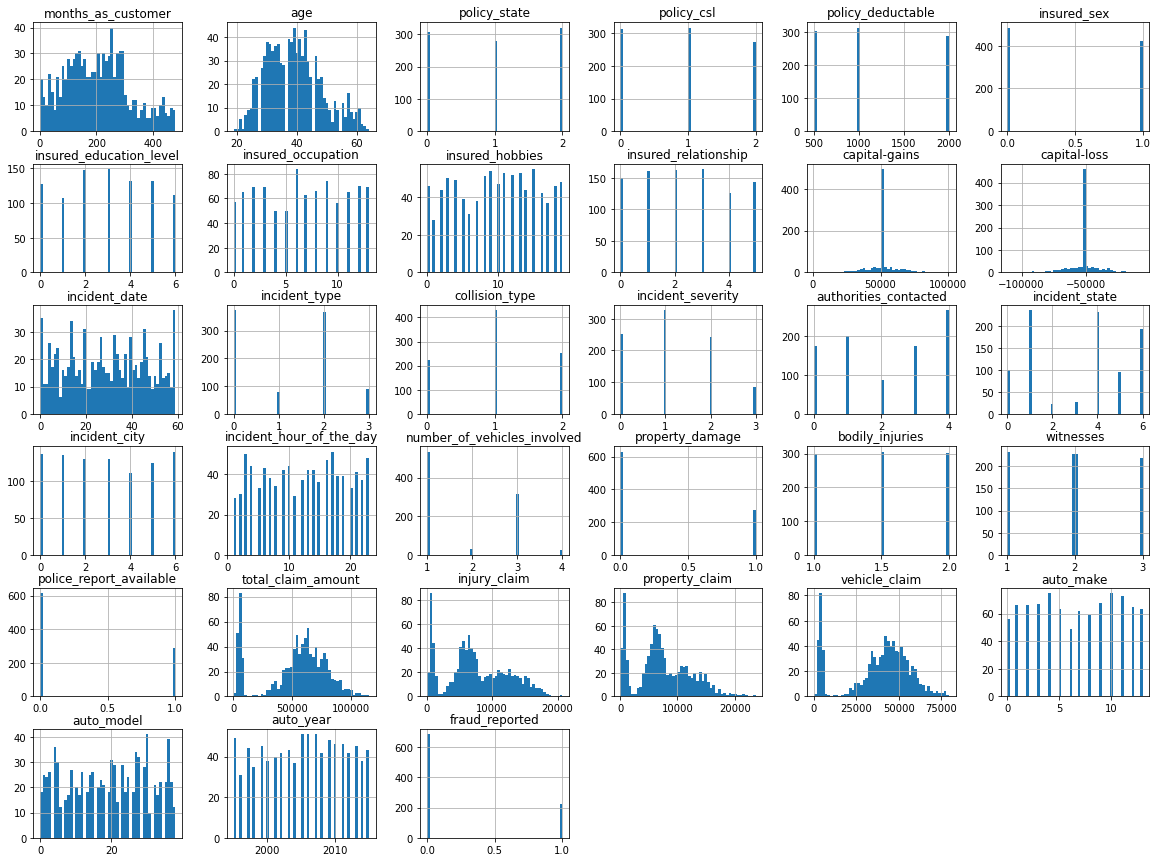

In [102]:
df.hist(bins=50,figsize=(20,15))

### Boxplot

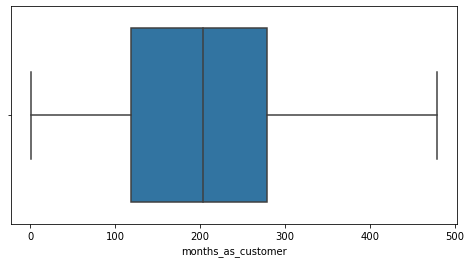

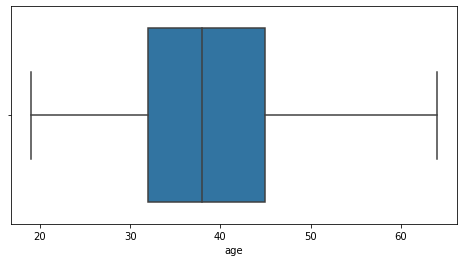

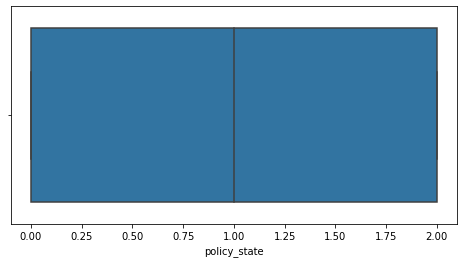

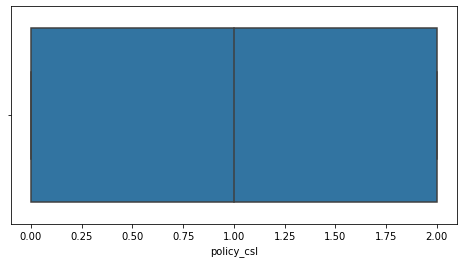

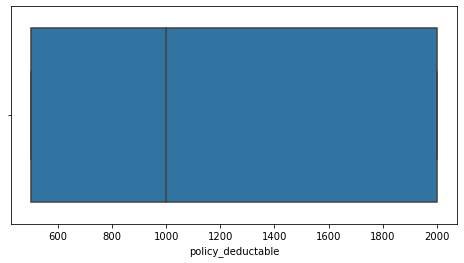

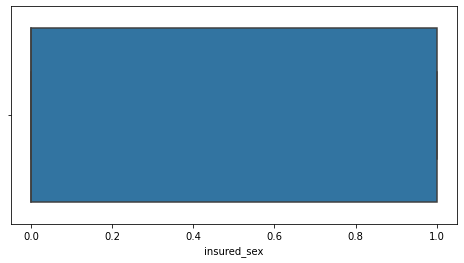

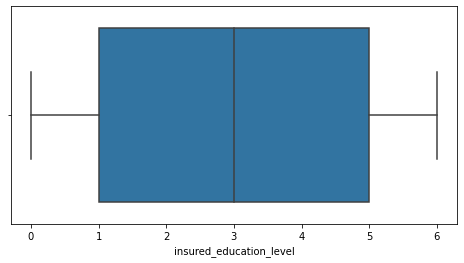

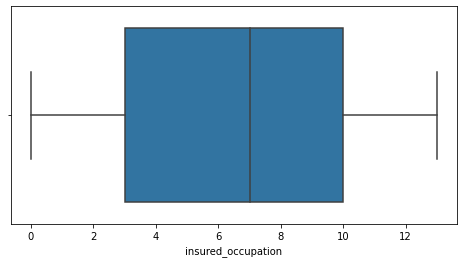

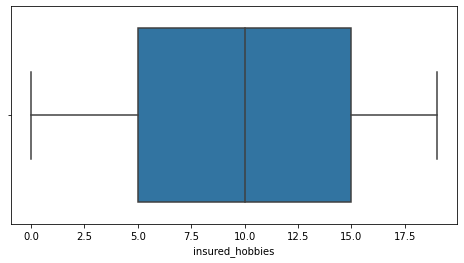

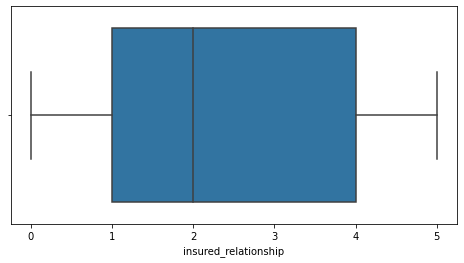

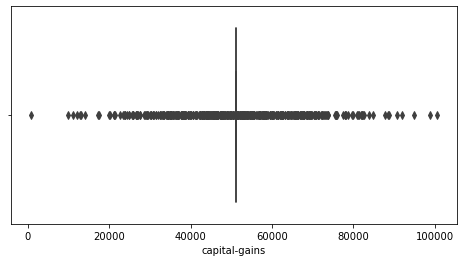

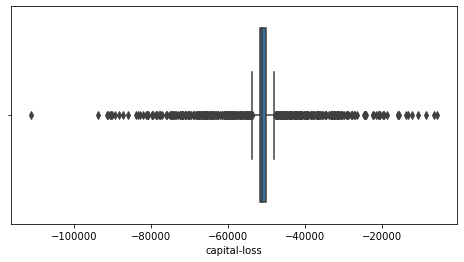

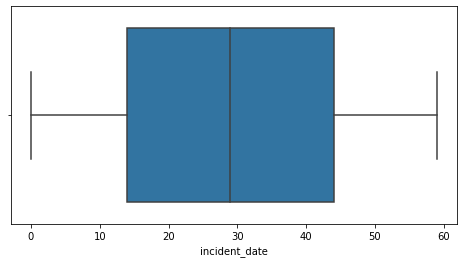

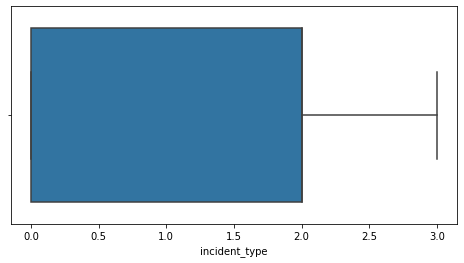

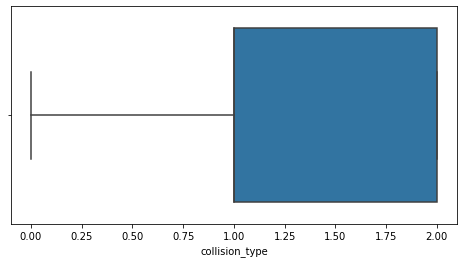

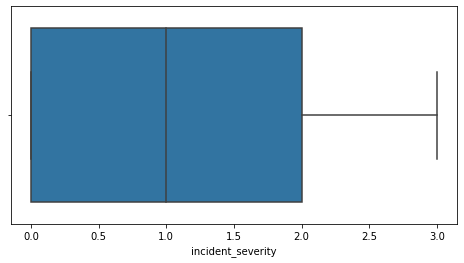

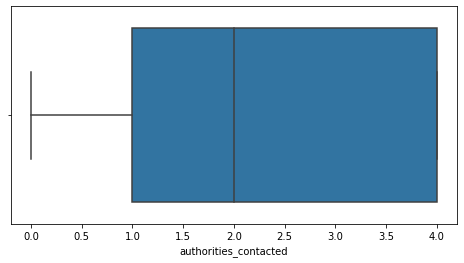

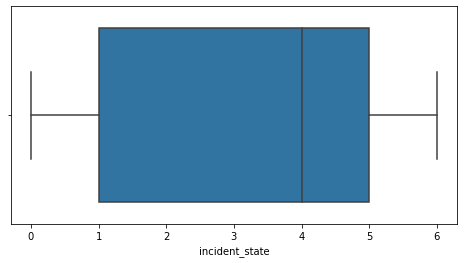

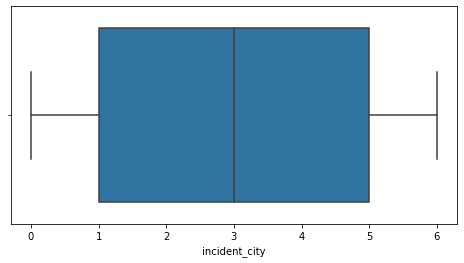

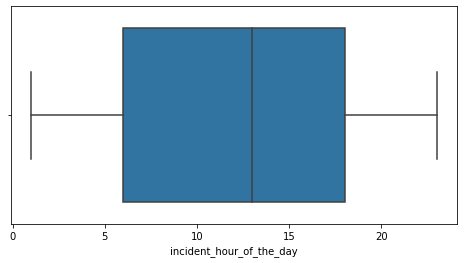

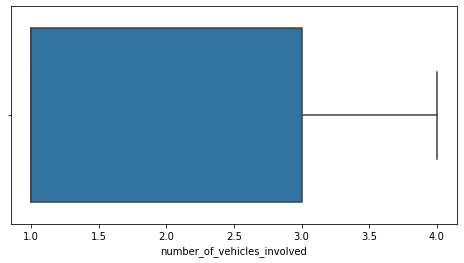

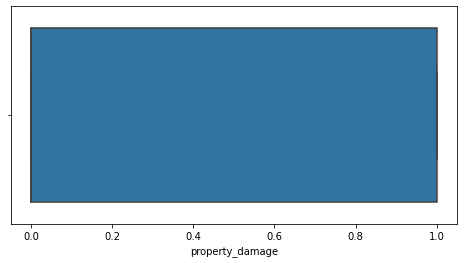

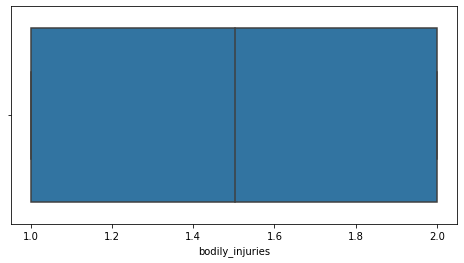

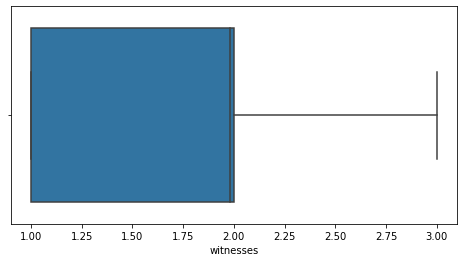

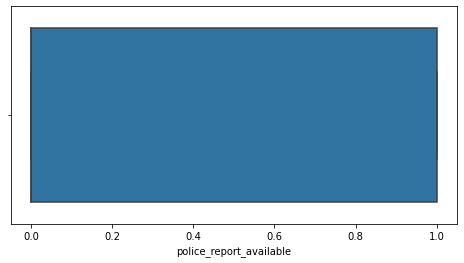

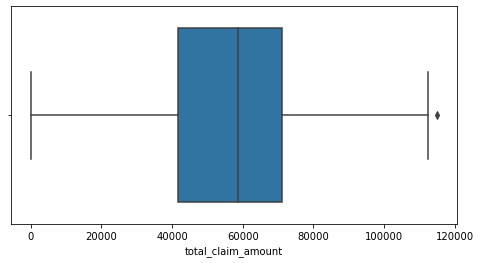

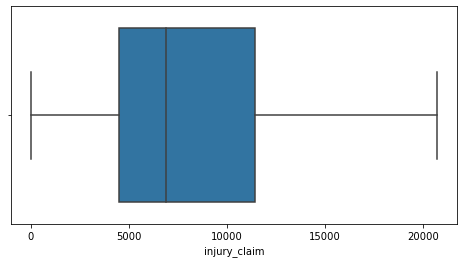

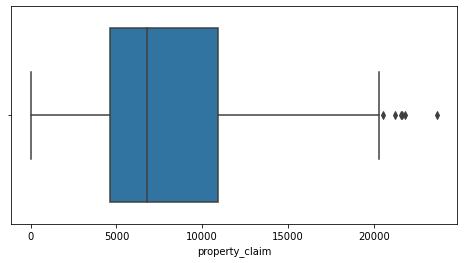

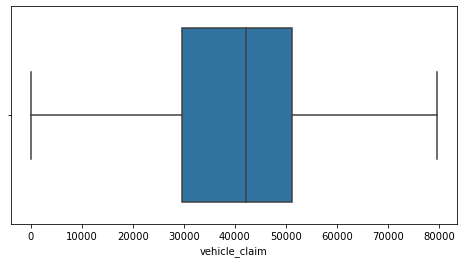

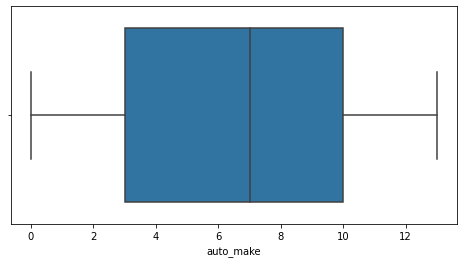

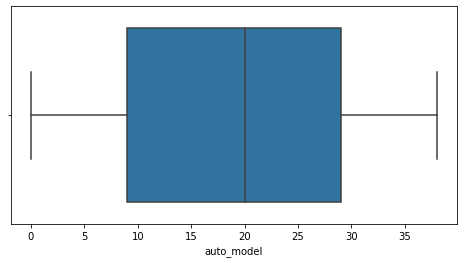

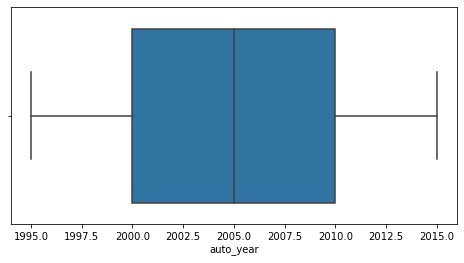

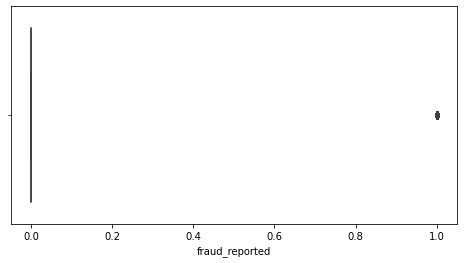

In [103]:
for column in df:
        plt.figure(figsize=(8,4))
        sn.boxplot(x=column,data=df)

### Distplot

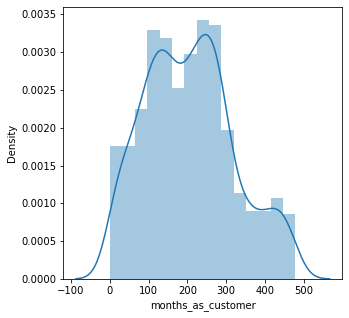

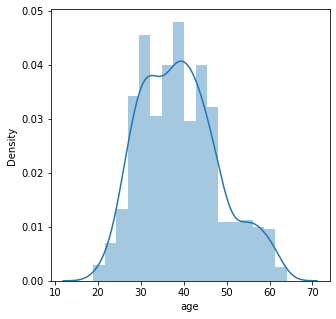

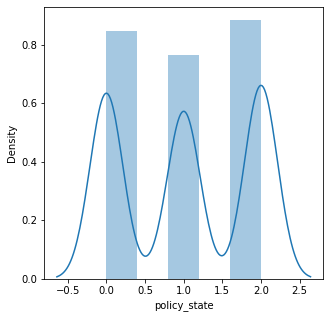

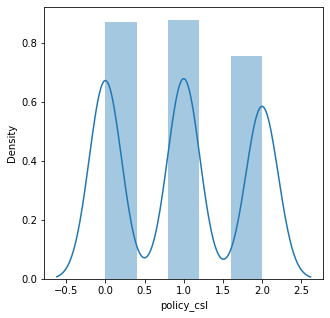

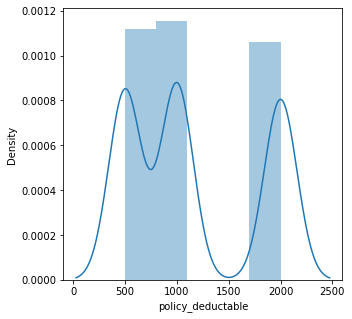

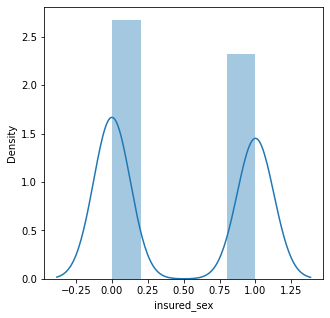

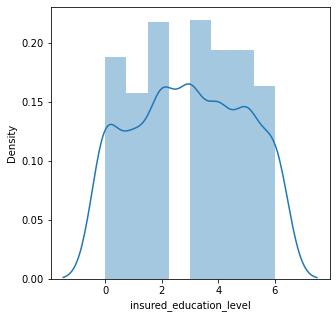

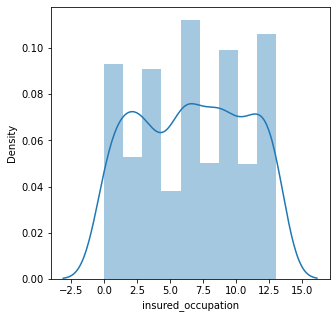

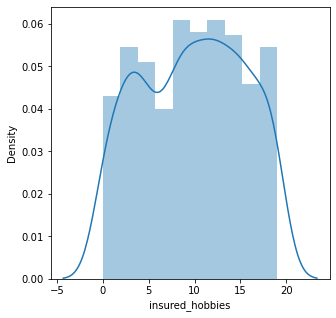

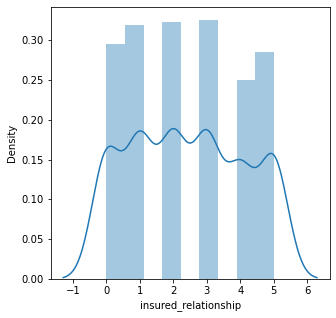

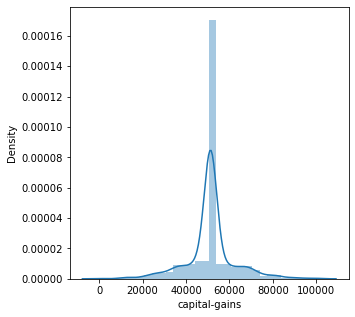

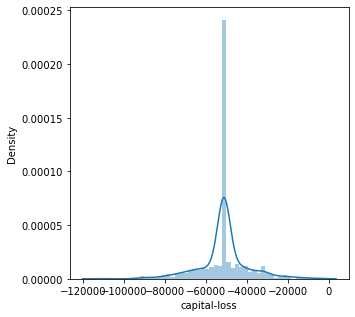

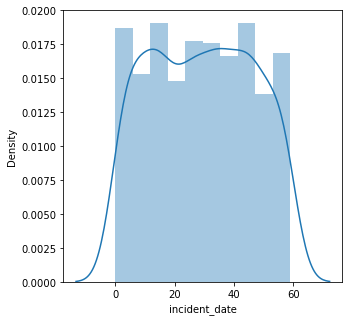

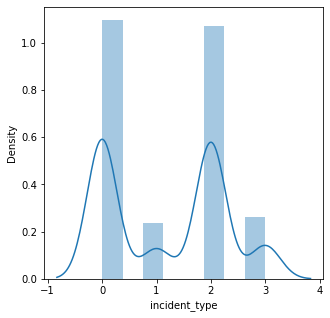

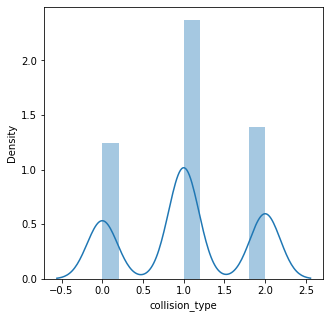

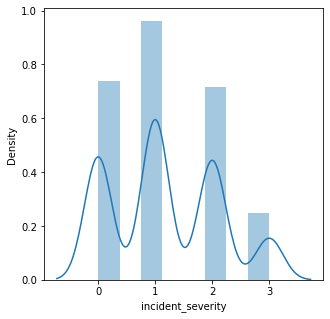

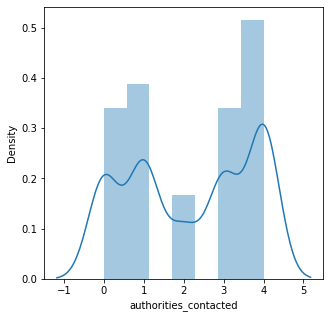

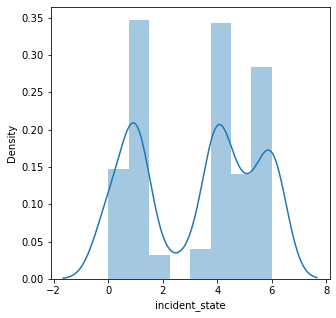

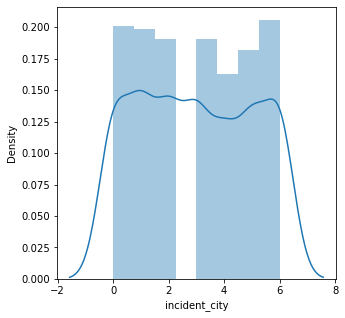

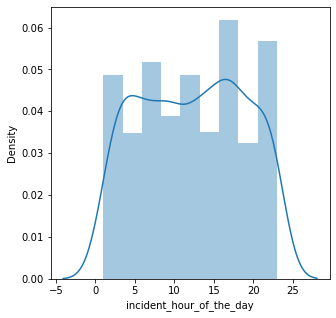

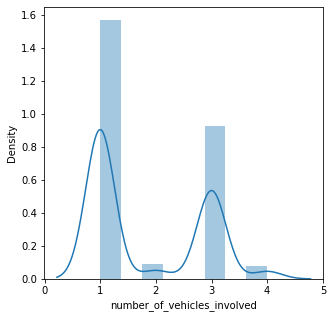

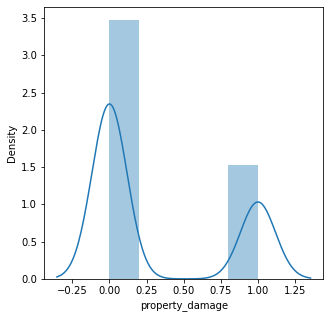

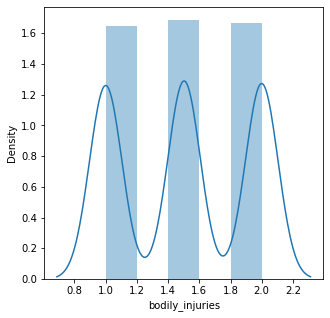

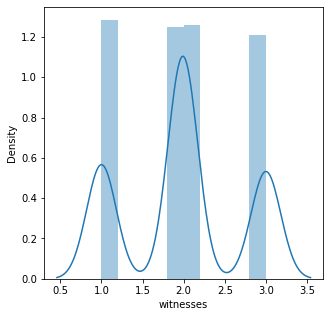

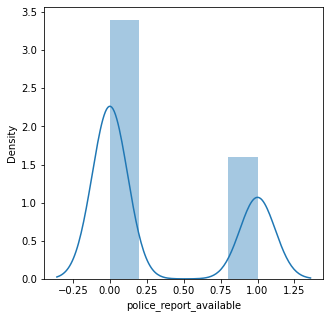

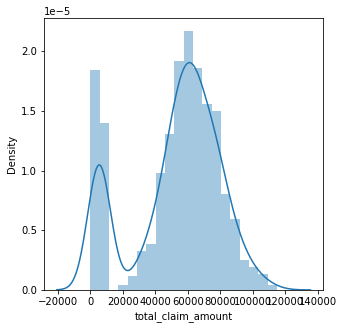

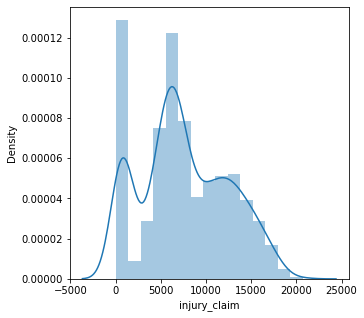

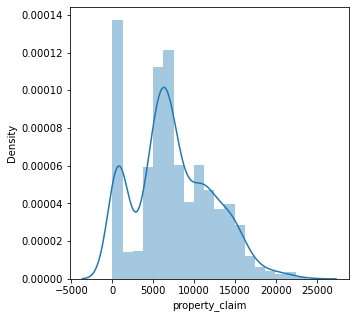

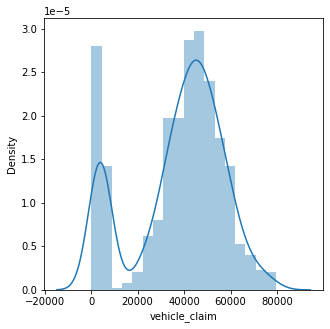

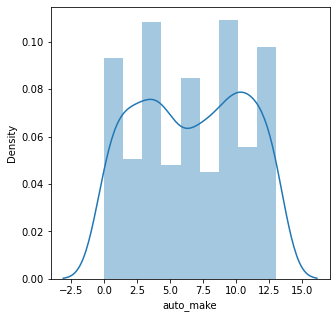

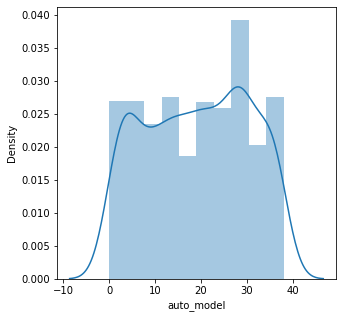

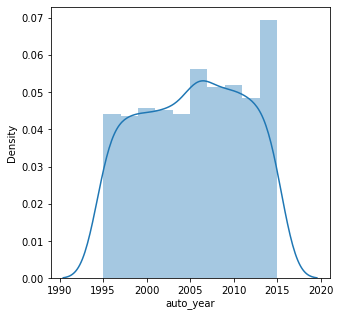

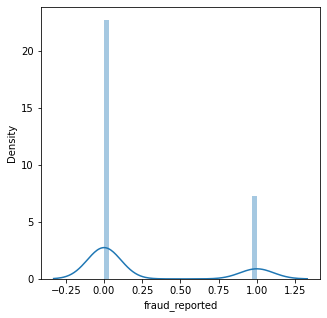

In [104]:
for column in df:
        plt.figure(figsize=(5,5))
        sn.distplot(df[column])

### Heatmap

<AxesSubplot:>

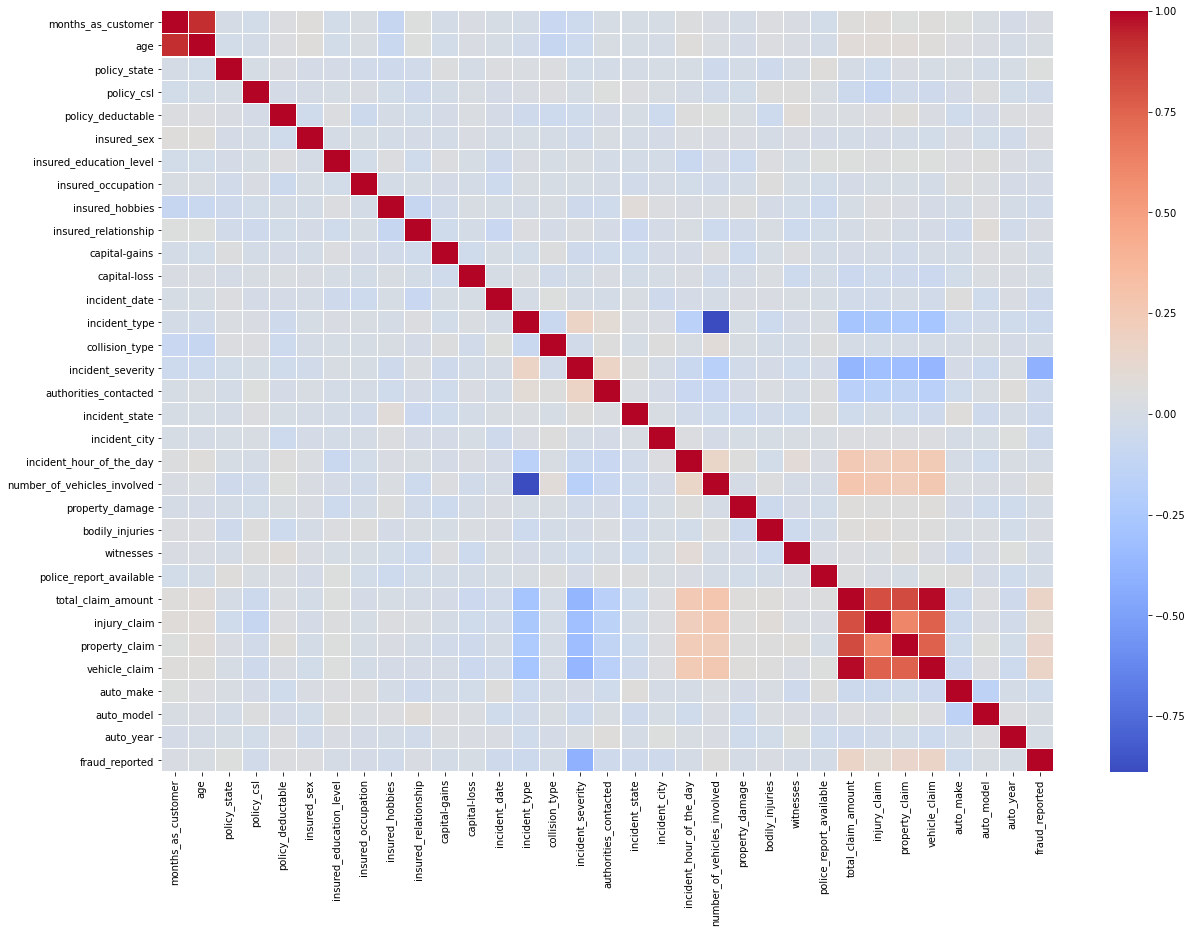

In [105]:
plt.figure(figsize=(20,14))
sn.heatmap(df.corr(),linewidths=.1,cmap="coolwarm", annot=False)

We have to delete number_of_vehicles_involved,months_as_customer,vehicle_claim,total_claim_amount,incident_severity

In [106]:
df.drop(columns={'number_of_vehicles_involved','months_as_customer','vehicle_claim','total_claim_amount','incident_severity'},axis=1,inplace=True)

### Class Imbalence Check

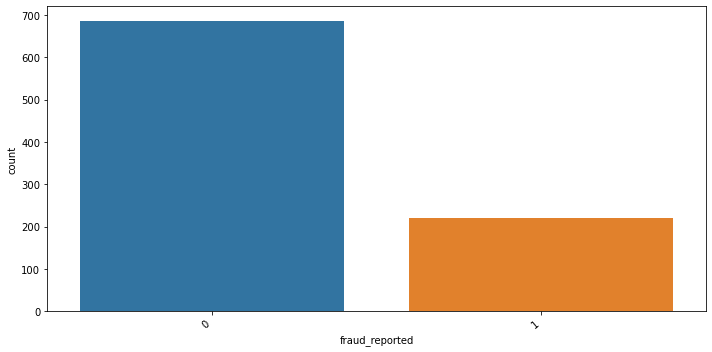

In [107]:
plt.figure(figsize=(10,5))
ax=sn.countplot(df["fraud_reported"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

classes are highly imbalanced

# Removing Outliers

In [108]:
from scipy.stats import zscore

In [109]:
z=np.abs(zscore(df))
df1=df[(z<3).all(axis=1)]

In [110]:
df1.shape

(871, 28)

# Skewness Removal

In [111]:
df.skew()

age                         0.453512
policy_state               -0.026862
policy_csl                  0.082073
policy_deductable           0.433716
insured_sex                 0.139487
insured_education_level    -0.012943
insured_occupation         -0.033642
insured_hobbies            -0.074845
insured_relationship        0.081585
capital-gains               0.091683
capital-loss               -0.085151
incident_date               0.018375
incident_type               0.087840
collision_type             -0.045144
authorities_contacted      -0.124555
incident_state             -0.146310
incident_city               0.048625
incident_hour_of_the_day   -0.027813
property_damage             0.846416
bodily_injuries            -0.012285
witnesses                   0.043694
police_report_available     0.768893
injury_claim                0.237088
property_claim              0.391724
auto_make                  -0.023707
auto_model                 -0.068855
auto_year                  -0.073475
f

In [112]:
from scipy.stats import boxcox

### property_damage

Its a catagorical column

### police_report_available

Its also a catagorical column

# Input Splitting

In [113]:
x=df.drop(["fraud_reported"],axis=1)

In [114]:
y=df["fraud_reported"]

# Oversampling our fraud_reported

In [115]:
from imblearn.over_sampling import RandomOverSampler

In [116]:
ros=RandomOverSampler(random_state=0)

In [117]:
x,y=ros.fit_resample(x,y)

# Finding The Best Model

In [118]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [119]:
#classify function
from sklearn.model_selection import cross_val_score,train_test_split
def classify(model,x,y):
    X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.10,random_state=343)
    #train the model
    model.fit(X_train,Y_train)
    ac=model.score(X_test,Y_test)*100
    print("Accuracy:",ac)
    
    #cross validation
    score=cross_val_score(model,x,y,cv=5)
    cv=np.mean(score)*100
    print("CV Score:",cv)
    
    #diffrence between them
    print("Diffrence:",abs(ac-cv))

In [120]:
DTC = DecisionTreeClassifier()
classify(DTC,x,y)

Accuracy: 56.76113360323887
CV Score: 88.6327803583278
Diffrence: 31.87164675508894


In [121]:
RC = RidgeClassifier()
classify(RC,x,y)

Accuracy: 54.5748987854251
CV Score: 56.63384207033842
Diffrence: 2.058943284913319


In [122]:
RFC = RandomForestClassifier()
classify(RFC,x,y)

Accuracy: 57.00404858299595
CV Score: 96.50484406104844
Diffrence: 39.500795478052495


In [123]:
KNN = KNeighborsClassifier()
classify(KNN,x,y)

Accuracy: 51.740890688259114
CV Score: 67.27352355673524
Diffrence: 15.532632868476128


In [124]:
ETC = ExtraTreesClassifier()
classify(ETC,x,y)

Accuracy: 58.8663967611336
CV Score: 97.8176509621765
Diffrence: 38.9512542010429


Ridge Classifier is our Best Model

# Hyper parameter tuning

In [125]:
RC.get_params()

{'alpha': 1.0,
 'class_weight': None,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [126]:
from sklearn.model_selection import GridSearchCV

In [127]:
params = {'copy_X': [True,False],
          'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
          'normalize': [True,False],
         'max_iter': [1000,1200,1400,1600,1800,2000],
         'random_state': ['scoring','verbose','warm_start']}

In [128]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.10,random_state=7)
gs = GridSearchCV(RC, params, verbose = 1, cv=5, n_jobs = -1)

In [129]:
gs.fit(X_train, Y_train)

Fitting 5 folds for each of 504 candidates, totalling 2520 fits


GridSearchCV(cv=5, estimator=RidgeClassifier(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'max_iter': [1000, 1200, 1400, 1600, 1800, 2000],
                         'normalize': [True, False],
                         'random_state': ['scoring', 'verbose', 'warm_start'],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga']},
             verbose=1)

In [130]:
gs.best_params_

{'copy_X': True,
 'max_iter': 1000,
 'normalize': False,
 'random_state': 'scoring',
 'solver': 'lsqr'}

# Checking Accuracy Score

In [131]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [134]:
RC=RidgeClassifier(copy_X=True,
 max_iter= 1000,
 normalize= False,
 random_state= 'scoring',
 solver='lsqr')

In [135]:
RC.fit(X_train,Y_train)

RidgeClassifier(max_iter=1000, random_state='scoring', solver='lsqr')

In [136]:
RC.score(X_test,Y_test)

0.557085020242915

In [137]:
y_test_pred=RC.predict(X_test)

In [138]:
print(RC.score(X_test, y_test_pred))

1.0


# Finally Saving our model

In [141]:
import joblib
joblib.dump(ETC,r"C:\Users\Avinash\Desktop\Projects\EvaluationProjects\11_InsuranceClaimFraudDetection\fraudDetection.pkl")

['C:\\Users\\Avinash\\Desktop\\Projects\\EvaluationProjects\\11_InsuranceClaimFraudDetection\\fraudDetection.pkl']